# 2020至2021年 Adidas 數據分析

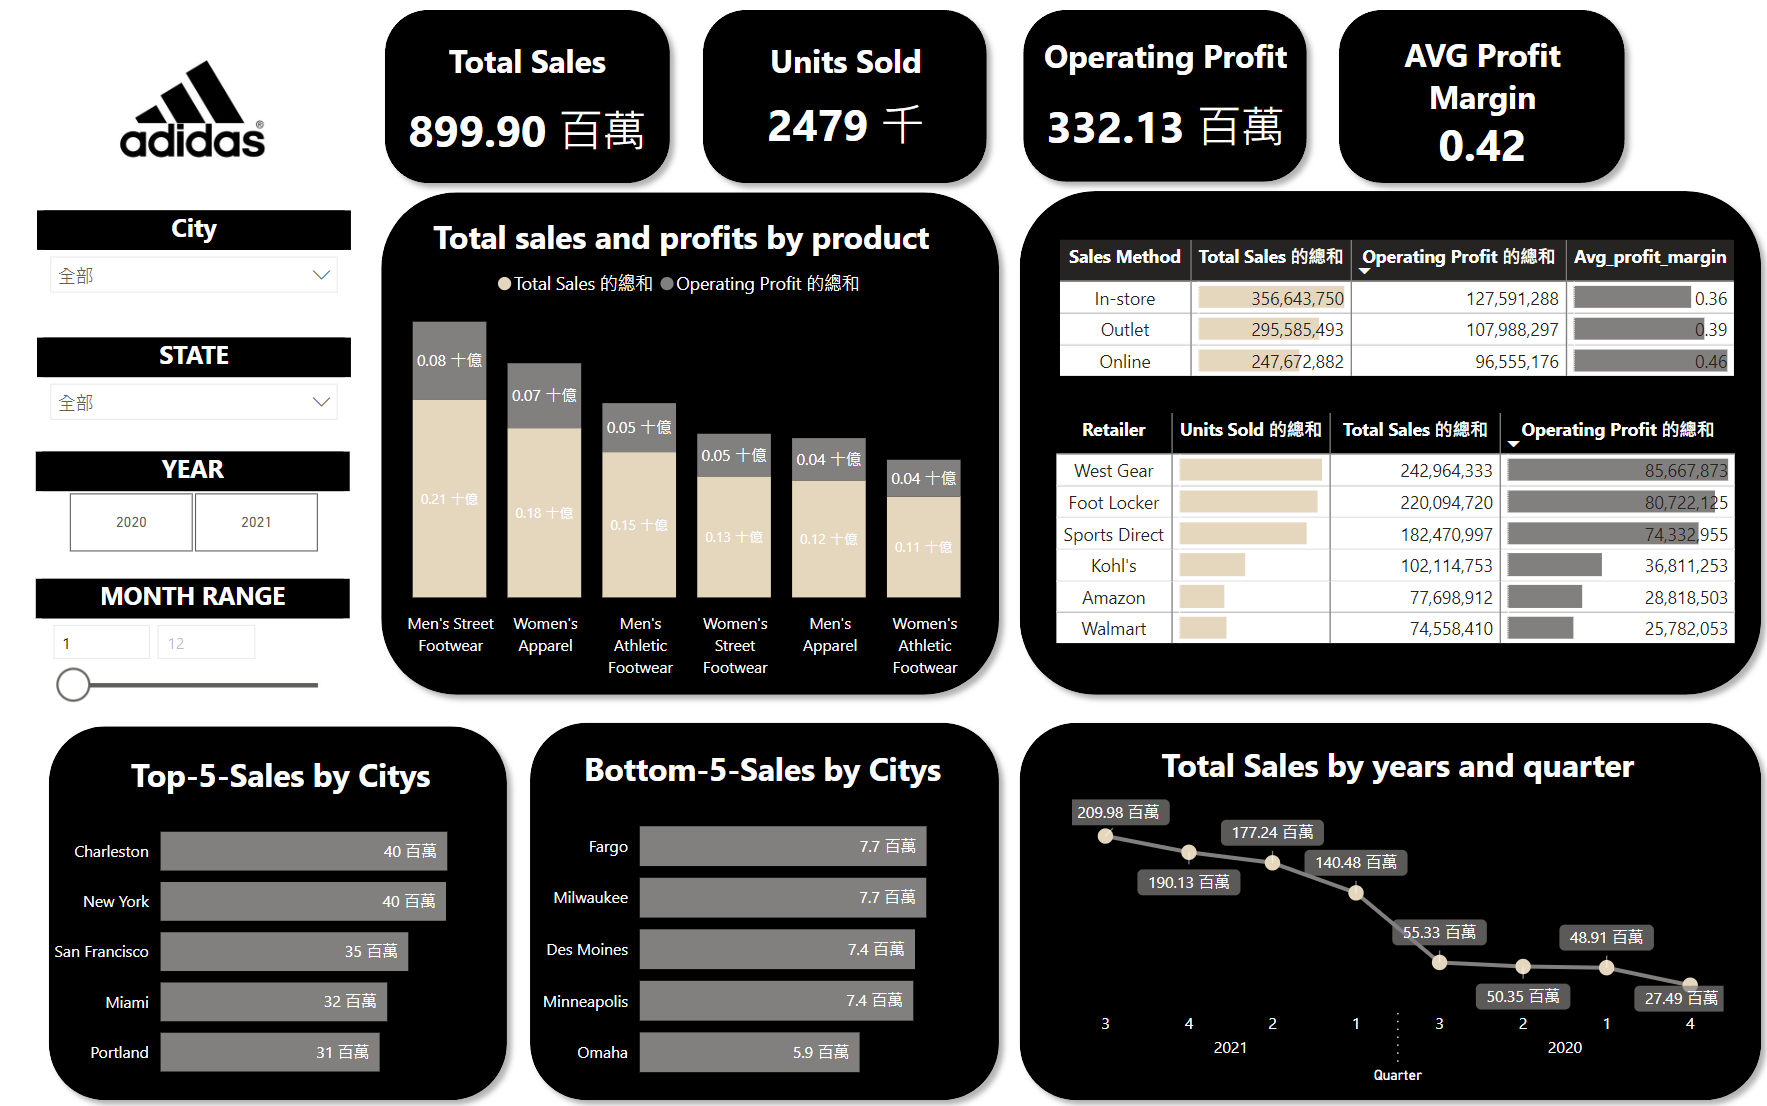

Adidas銷售資料集是包含Adidas產品銷售資訊的資料集合。此類資料集可能包括諸如銷售單位數量、總銷售收入、銷售地點、銷售產品類型以及任何其他相關資訊等詳細資訊。
Adidas銷售數據可用於多種目的，例如分析銷售趨勢、識別成功的產品或行銷活動以及製定未來銷售策略。 它還可用於將Adidas的銷售額與競爭對手的銷售額進行比較，或分析不同行銷或銷售管道的有效性。

有多種來源可能提供Adidas銷售資料集，包括Adidas本身、市場研究公司、政府機構或追蹤銷售資料的其他組織。 Adidas銷售資料集中包含的具體數據點可能會有所不同，具體取決於來源和使用目的。

資料來源：https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

### 定義問題
* 銷售業績：2020年與2021年哪些產品銷售表現出色，哪些產品銷售不佳？
* 區域市場分析：2020年/2021年哪些商店銷售強勁，哪些商店銷售落後？
* 銷售方式的效率：哪種銷售方法更有效 - 店內銷售還是線上銷售？
* 價格分析：是否有一個特定的價格範圍可以比其他價格範圍實現更好的銷售？
* 商品組合最佳化：確定哪些產品最有利可圖，並依地點細分。


In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'Adidas US Sales Datasets.xlsx')

In [21]:
df.shape

(9648, 13)

In [69]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [72]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
# Price per Unit、Operating Profit有非數字字元"$"
# Total Sales 有非數字字元"$"、","
# Operating Margin 有非數字字元"%"

df["Price per Unit"] = df["Price per Unit"].replace({"\$": ""}, regex=True).astype(float)
df["Operating Profit"] = df["Price per Unit"].replace({"\$": ""}, regex=True).astype(float)
df["Operating Margin"] = df["Operating Margin"].replace({"\%": ""}, regex=True).astype(float)
df["Total Sales"] = df["Total Sales"].replace({"\,": "", "\$":""}, regex=True).astype(float)
df["Units Sold"] = df["Units Sold"].replace({"\,": ""}, regex=True).astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


In [5]:
# Invoice Date轉換為Datatime object
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


In [27]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,50.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,50.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,40.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,45.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,60.0,0.30,In-store


#### 銷售業績：2020年與2021年哪些產品銷售表現出色，哪些產品銷售不佳？
我想知道疫情剛開始的一年和後一年消費者購買的鞋款類別會是一樣的嗎?

In [6]:
df["year"] = df["Invoice Date"].dt.year
df["month"] = df["Invoice Date"].dt.month
year2020_df = df[df["year"] == 2020]
year2021_df = df[df["year"] == 2021]

product_sales_2020 = year2020_df.groupby("Product").agg({"Total Sales": "sum", "Units Sold": "sum"}).reset_index()
product_sales_2021 = year2021_df.groupby("Product").agg({"Total Sales": "sum", "Units Sold": "sum"}).reset_index()

top_performing_products_2020 = product_sales_2020.sort_values(by="Total Sales", ascending = False)
top_performing_products_2021 = product_sales_2021.sort_values(by="Total Sales", ascending = False)

print("Sales performance in 2020 ranked by sales:\n", top_performing_products_2020)
print("===============================================")
print("Sales performance in 2021 ranked by sales:\n", top_performing_products_2021)
print("===============================================")
merged_product_sales = pd.merge(top_performing_products_2020, top_performing_products_2021, on="Product", suffixes=("_2020", "_2021"))
merged_product_sales["Sales Growth Rate"] = round(((merged_product_sales["Total Sales_2021"] - merged_product_sales["Total Sales_2020"]) / merged_product_sales["Total Sales_2020"]) * 100, 2)
print("2020-2021年各產品銷售增長率:\n", merged_product_sales.sort_values(by="Sales Growth Rate", ascending=False))


Sales performance in 2020 ranked by sales:
                      Product  Total Sales  Units Sold
2      Men's Street Footwear   37823020.0     99186.0
3            Women's Apparel   35190332.0     80208.0
1    Men's Athletic Footwear   31794462.0     81760.0
5    Women's Street Footwear   27426005.0     75791.0
0              Men's Apparel   26216964.0     61227.0
4  Women's Athletic Footwear   23629892.0     64177.0
Sales performance in 2021 ranked by sales:
                      Product  Total Sales  Units Sold
2      Men's Street Footwear  171003224.0    494134.0
3            Women's Apparel  143848528.0    353619.0
1    Men's Athletic Footwear  121879218.0    353766.0
5    Women's Street Footwear  100576808.0    316478.0
0              Men's Apparel   97511668.0    245456.0
4  Women's Athletic Footwear   83002004.0    253059.0
2020-2021年各產品銷售增長率:
                      Product  Total Sales_2020  Units Sold_2020  \
0      Men's Street Footwear        37823020.0          99186.0   
1

* 連續兩年銷售類別第一名都是Men's Street Footwear，且銷售類別前五名皆相同，從各年銷售數量來看，男性與女性對於運動鞋的需求Street Footwear高於Athletic Footwear鞋款，表示重視可休閒日常穿著的群體大於重視性能的群體，可能為在家工作趨勢的增加、運動和健康意識提高、在家運動的需求增加、網購的普及等等有關
* 兩年間各鞋款總銷售額增長率皆突破200%，最高達到308%，表示市場對於運動鞋的需求量爆炸性增長，可能與消費模式有關 為了確認是否與消費模式有很大的關係，觀測兩年的sales Method

延伸問題：兩年間的銷售增長率是否與消費模式有關？

2020年各銷售模式銷售數量:
 Sales Method
In-store    156575.0
Online       87085.0
Outlet      218689.0
Name: Units Sold, dtype: float64
2021年各銷售模式銷售數量:
 Sales Method
In-store    533415.0
Online      852008.0
Outlet      631089.0
Name: Units Sold, dtype: float64
2020-2021各銷售模式成長率:
 Sales Method
In-store    240.68
Online      878.36
Outlet      188.58
Name: Units Sold, dtype: float64


C:\Users\coffe\AppData\Local\Temp\ipykernel_27928\3515783569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_method_2020 =year2020_df.groupby(["Sales Method"]).sum()["Units Sold"]
C:\Users\coffe\AppData\Local\Temp\ipykernel_27928\3515783569.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_method_2021 =year2021_df.groupby(["Sales Method"]).sum()["Units Sold"]


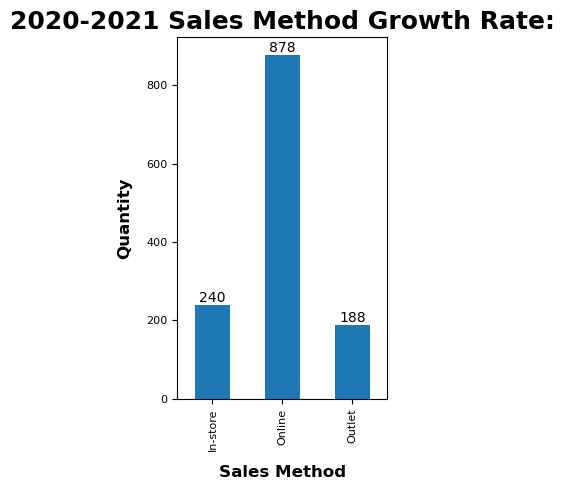

In [77]:
# 2020年
sales_method_2020 =year2020_df.groupby(["Sales Method"]).sum()["Units Sold"]
print("2020年各銷售模式銷售數量:\n", sales_method_2020)
print("===============================================")

# 2021年
sales_method_2021 =year2021_df.groupby(["Sales Method"]).sum()["Units Sold"]
print("2021年各銷售模式銷售數量:\n", sales_method_2021)
print("===============================================")

# growth rate
sales_mothod_growth_rate = round(((sales_method_2021 - sales_method_2020) / sales_method_2020) * 100, 2)
print("2020-2021各銷售模式成長率:\n", sales_mothod_growth_rate)

print("===============================================")
plt.figure(figsize = (3,5))
plt.title("2020-2021 Sales Method Growth Rate:", weight = "bold", fontsize = 18)
plt.xlabel("Sales Mothod", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = sales_mothod_growth_rate.plot(kind = "bar")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

* 可以看出全球消費者這兩年間的消費模式有很大的改變，網購變成主要的消費模式

#### 銷售方式的效率：哪種銷售方法更有效 - 店內銷售還是線上銷售？

In [30]:
sales_method = data.groupby("Sales Method").agg({"Total Sales": "sum", "Operating Profit": "sum"})

# 各消費模式的利潤率
sales_method["Operating Margin"] = sales_method["Operating Profit"] / sales_method["Total Sales"]
sales_method

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,1.275913e+08,0.357756
Online,247672882.0,9.655518e+07,0.389850
Outlet,295585493.0,1.079883e+08,0.365337


總銷售額: In-Store最高，接著是outlet、online
* In-store: 356,643,750
* online: 247,672,882
* outlet: 295,585,493

營業利潤: 與總銷售額一樣，In-Store最高，接著是outlet、online
* In-store: 127,591,300
* online: 9,655,180
* outlet: 107,988,300

營業利潤率: 
* In-store: about 35.78%
* online: about 38.99%
* outlet: about 36.53%

小總結:
* 實體店面銷售總銷售額和營業利潤為最高，但線上銷售的營業利潤率最高
* 若策略重點為最大化銷售，那麼就可以選擇實體店面銷售
* 若策略重點為每銷售額產生的利潤，那麼就可以選擇線上銷售

#### 區域市場分析：哪些商店銷售強勁，哪些商店銷售落後？

In [31]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,50.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,50.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,40.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,45.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,60.0,0.30,In-store,2020,1


先以Region觀測各地區經濟狀況

In [7]:
# 2020年
region_groupby_2020 = year2020_df.groupby(["Region"]).sum()["Total Sales"].sort_values(ascending = False)
print("2020年地區總銷售額第一名: ",region_groupby_2020.index[0])
print("2020年地區總銷售額:\n",region_groupby_2020)

print("===============================================")
# 2021年
region_groupby_2021 = year2021_df.groupby(["Region"]).sum()["Total Sales"].sort_values(ascending = False)
print("2021年地區總銷售額第一名: ", region_groupby_2021.index[0])
print("2021年地區總銷售額:\n",region_groupby_2021)

print("===============================================")
# 2020-2021年鞋款銷售數量成長率
region_growth_rate = round(((region_groupby_2021 - region_groupby_2020) / region_groupby_2020) * 100, 2) 
print("2020-2021年各地區總銷售額成長率:\n",region_growth_rate.sort_values(ascending = False))

2020年地區總銷售額第一名:  West
2020年地區總銷售額:
 Region
West         76895153.0
Northeast    40749709.0
Southeast    31600863.0
South        25456882.0
Midwest       7378068.0
Name: Total Sales, dtype: float64
2021年地區總銷售額第一名:  West
2021年地區總銷售額:
 Region
West         193048029.0
Northeast    145574358.0
Southeast    131570373.0
Midwest      128422391.0
South        119206299.0
Name: Total Sales, dtype: float64
2020-2021年各地區總銷售額成長率:
 Region
Midwest      1640.60
South         368.27
Southeast     316.35
Northeast     257.24
West          151.05
Name: Total Sales, dtype: float64


C:\Users\coffe\AppData\Local\Temp\ipykernel_13220\1195247285.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_groupby_2020 = year2020_df.groupby(["Region"]).sum()["Total Sales"].sort_values(ascending = False)
C:\Users\coffe\AppData\Local\Temp\ipykernel_13220\1195247285.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_groupby_2021 = year2021_df.groupby(["Region"]).sum()["Total Sales"].sort_values(ascending = False)


* 若以地區來看的話，美國中西部和南部增長率為前兩名，尤其是美國中西部增長1640%，表示經濟開始復甦
* 美國西部雖然為總銷售額增長率最後一名，但是為2020年與2021年總銷售額第一名，代表市場與其他地區相比較穩定，也可以反映當地區的經濟活動

接著再以City細分市場觀測每個城市銷售最佳及最差的零售商

In [32]:
df["City"].nunique()

52

In [9]:
# City、Retailer、Units Sold

retailer_group = df.groupby(["City", "Retailer"])[["Units Sold", "Total Sales"]].sum().reset_index()
retailer_group_sorted = retailer_group.sort_values(by=["City", "Units Sold", "Total Sales"], ascending = [True, False, False])
retailer_group

,City,Retailer,Units Sold,Total Sales
0,Albany,Kohl's,10053.0,3692639.0
1,Albany,West Gear,47133.0,20735165.0
2,Albuquerque,Kohl's,43752.0,17065965.0
3,Albuquerque,Sports Direct,8881.0,2799051.0
4,Anchorage,Amazon,26749.0,13365025.0
...,...,...,...,...
103,St. Louis,West Gear,7527.0,1701133.0
104,Wichita,Foot Locker,8940.0,3520950.0
105,Wichita,Kohl's,20523.0,6451914.0
106,Wilmington,Foot Locker,20924.0,8387568.0


In [10]:
print("每個城市銷售最佳的商店：")
top_performers = retailer_group_sorted.groupby("City").head(1)
top_performers.head()

每個城市銷售最佳的商店：


,City,Retailer,Units Sold,Total Sales
1,Albany,West Gear,47133.0,20735165.0
2,Albuquerque,Kohl's,43752.0,17065965.0
4,Anchorage,Amazon,26749.0,13365025.0
7,Atlanta,Sports Direct,41414.0,14797498.0
8,Baltimore,Foot Locker,9322.0,3635043.0


In [11]:
print("每個城市銷售最差的商店：")
worst_performers = retailer_group_sorted.groupby("City").tail(1)
worst_performers.head()

每個城市銷售最差的商店：


,City,Retailer,Units Sold,Total Sales
0,Albany,Kohl's,10053.0,3692639.0
3,Albuquerque,Sports Direct,8881.0,2799051.0
5,Anchorage,Foot Locker,4066.0,1388078.0
6,Atlanta,Foot Locker,14977.0,4199968.0
10,Baltimore,West Gear,5647.0,1858031.0


透過以上數據，可以針對銷售最佳商店與最差商店給予不同策略

1. 若策略重點為最大化銷售：
* 市場占有率提升: 分析最佳商店成功因素，像是位置、人/網路流量、促銷活動、等資訊，尋找客戶需求
* 尋找提高銷售額的機會：若有庫存數據，可以做優化庫存管理數據分析
2. 若策略重點為利潤：
* 尋找高價值客戶：若有客戶消費資料的話，可以做RFM分析
* 產品組合：確認數據中有沒有附加銷售的機會，以增加每筆交易的利潤

#### 商品組合最佳化：確定哪些產品最有利可圖，並依地點細分。

In [63]:
# 目的為依獲利能力(Profit Margin)查看城市哪個Produt較有利
# 每個城市及商品總銷售和營業利潤
product_mix_data = df.groupby(["City", "Product"]).agg({"Total Sales": "sum", "Operating Profit": "sum"}).reset_index()

# 計算營業利潤率
product_mix_data["Profit Margin"] = product_mix_data["Operating Profit"] / product_mix_data["Total Sales"]

# sort values，city由小到大，Profit margin由大到小
product_mix_data.sort_values(by=["City", "Profit Margin"], ascending=[True, False], inplace=True)

# 找出各城市profit margin前五名的產品
top_products_by_city = product_mix_data.groupby("City").head(5)
top_products_by_city

,City,Product,Total Sales,Operating Profit,Profit Margin
3,Albany,Women's Apparel,4779109.0,2343150.19,0.490290
2,Albany,Men's Street Footwear,5773987.0,2649927.25,0.458942
0,Albany,Men's Apparel,3873553.0,1354932.08,0.349791
1,Albany,Men's Athletic Footwear,3829596.0,1329200.59,0.347086
4,Albany,Women's Athletic Footwear,2973011.0,908094.68,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,2520405.0,1016327.95,0.403240
310,Wilmington,Women's Athletic Footwear,1242580.0,500967.12,0.403167
311,Wilmington,Women's Street Footwear,1502297.0,605627.89,0.403135
308,Wilmington,Men's Street Footwear,3522197.0,1244055.88,0.353205


In [67]:
# 目的為依銷售額(Total Sales)查看城市哪個Produt較有利
# 各城市的商品依總銷售額區分
grouped_data = df.groupby(["Product", "City"])["Total Sales"].sum().reset_index()

# 找出各城市總銷售額最佳與最差的商品
best_worst_performing_cities = []

for product in grouped_data["Product"].unique():
    product_data = grouped_data[grouped_data["Product"] == product]
    best_city = product_data[product_data["Total Sales"] == product_data["Total Sales"].max()]
    worst_city = product_data[product_data["Total Sales"] == product_data["Total Sales"].min()]
    best_worst_performing_cities.extend([best_city, worst_city])

# 連結成一個dataframe
best_worst_performing_cities_df = pd.concat(best_worst_performing_cities).reset_index(drop=True)

print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_df

Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


* 在Albany營業利潤率高的商品是Women's Apparel(女性服裝)及Men's Street Footwear(男性街頭鞋)，分別為49%及46%；Wilmington營業利潤高的商品為Women's Apparel及Women's Athletic Footwear(女性運動鞋)，皆約40%，表示依地區不同，商品的獲利能力也會不同
* 查看總銷售額列表，New York在產品Men's Apparel、Men's Athletic Footwear、	Women's Athletic Footwear銷售強勁，表示當地消費者對此商品的需求較高；
* 查看總銷售額列表，Charleston在商品Men's Street Footwear、Women's Apparel銷售強勁，當地消費者對此兩類商品需求較高
* 查看總銷售額列表，Omaha在所有商品的總銷售額皆為最低，表示在此地區的市場滲透率較低，需要對此地重新進行市場調查，重新評估策略

#### 價格分析：是否有一個特定的價格範圍可以比其他價格範圍實現更好的銷售？

In [56]:
# 利用數值區間將數值分類
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

# 定義價格區間
df["Price Range"] = pd.cut(df["Price per Unit"], bins)

# 每個價格區間的總銷售額
sales_by_price_range = df.groupby("Price Range")["Total Sales"].sum().reset_index()

# sort values by total sales
sorted_sales_by_price_range = sales_by_price_range.sort_values(by="Total Sales", ascending=False)
sorted_sales_by_price_range

,Price Range,Total Sales
4,"(40, 50]",220666307.0
5,"(50, 60]",210865002.0
6,"(60, 70]",190679285.0
3,"(30, 40]",134726187.0
7,"(70, 80]",52787579.0
8,"(80, 90]",33547420.0
2,"(20, 30]",29636023.0
9,"(90, 100]",14468685.0
1,"(10, 20]",6574478.0
11,"(110, 120]",3080000.0


* 總銷售額最高的組合為價格範圍為40至50，表示這區間的需求較受歡迎且需求量大
* 總銷售額第二高的組合為50至60、第三高的組合為60至70，這兩個組合的總銷售額成效也很好
* 當價格高於70後的總銷售額與30至40的總銷售額相差約8000萬美金，表示當價格高於70的商品，消費者需求顯著下降；而價格低於20的總銷額也不佳，可能與品質、機能、時尚性、目標客群等因素，導致銷售不佳
* 價格定位在40至70看起來可以得到好的銷售額，表示消費者更願意購買這個價格區段的商品


#### 結論

1. 銷售額分析之結果
* 兩年間各鞋款總銷售額增長率皆突破200%，表示市場對於運動鞋的需求量爆炸性增長，可能與消費模式有關
* 從銷售模式線上購物突破800%的增長率，可以確認上面觀點
* 若策略重點為最大化銷售，那麼就可以選擇實體店面銷售
* 若策略重點為每銷售額產生的利潤，那麼就可以選擇線上銷售，約營業利潤率39%

2. 產品分析之結果
* 依地區不同，各商品的獲利能力也會不同
* 產品價格組合範圍為40至50的需求最高

3. 區域分析之結果
* 美國西部連續兩年皆為總銷售額最高地區且增長率最低，表示該區域整體經濟較為穩定
